In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
plt.style.use("ggplot")

In [72]:
df = pd.read_csv(r'bitmex_xbt_4h.csv')

In [73]:
df = df[200:-100]

In [74]:
df.index=pd.to_datetime(df['datetime'])

In [75]:
df = df.resample('D').mean()

In [92]:
class KDJ_calculator:
    """

    """

    def __init__(self, data, n_period):
        self.data = data
        self.n_period = n_period

    def rsv(self):
        n_high = self.data.high.rolling(self.n_period).max()
        n_low = self.data.low.rolling(self.n_period).min()
        rsv = ((self.data.close - n_low) / (n_high - n_low)) * 100
        rsv.dropna(inplace=True)
        self.rsv = rsv

    def kdj_calculator(self):
        self.k_values, self.d_values, self.j_values = [], [], []

        for idx, value in enumerate(self.rsv):
            if idx == 0:
                K, D, J = 50, 50, 50
                self.k_values.append(K)
                self.d_values.append(D)
                self.j_values.append(J)
            else:
                K = (2 / 3) * self.k_values[-1] + (1 / 3) * value
                D = (2 / 3) * self.d_values[-1] + (1 / 3) * K
                J = 3 * K - 2 * D
                self.k_values.append(K)
                self.d_values.append(D)
                self.j_values.append(J)

    def show_kdj_indicator(self):
        self.kdj_df = pd.DataFrame([self.k_values, self.d_values, self.j_values]).T
        self.kdj_df.columns = ['K', 'D', 'J']
        return self.kdj_df

    def combine_kdj_to_raw_data(self):
        tmp_df = self.data[self.n_period - 1:]
        self.kdj_df.index = tmp_df.index
        self.kdj_indicators = pd.concat([tmp_df, self.kdj_df], axis=1)
        return self.kdj_indicators


In [93]:
kdj = KDJ_calculator(df,9)

In [94]:
kdj.rsv()

In [95]:
kdj.kdj_calculator()

In [96]:
kdj.show_kdj_indicator()

,K,D,J
0,50.000000,50.000000,50.000000
1,35.617016,45.205672,16.439704
2,27.478113,39.296486,3.841368
3,23.133159,33.908710,1.582057
4,25.771675,31.196365,14.922296
5,20.358575,27.583768,5.908188
6,15.760435,23.642657,-0.004010
7,12.583166,19.956160,-2.162823
8,17.066717,18.993012,13.214126
9,23.146742,20.377589,28.685048


In [97]:
kdj.combine_kdj_to_raw_data()

,close,high,low,open,timestamp,volume,K,D,J
datetime,,,,,,,,,
2018-05-11,8837.500000,8999.916667,8791.000000,8961.416667,1.526005e+12,6.535401e+08,50.000000,50.000000,50.000000
2018-05-12,8441.250000,8572.916667,8337.416667,8481.083333,1.526090e+12,6.533506e+08,35.617016,45.205672,16.439704
2018-05-13,8507.166667,8566.750000,8369.750000,8463.833333,1.526177e+12,4.519327e+08,27.478113,39.296486,3.841368
2018-05-14,8550.250000,8647.666667,8412.916667,8522.333333,1.526263e+12,5.438151e+08,23.133159,33.908710,1.582057
2018-05-15,8694.916667,8816.583333,8625.333333,8738.083333,1.526350e+12,4.203698e+08,25.771675,31.196365,14.922296
2018-05-16,8343.083333,8471.333333,8232.666667,8381.500000,1.526435e+12,5.163836e+08,20.358575,27.583768,5.908188
2018-05-17,8295.583333,8383.333333,8220.166667,8292.833333,1.526523e+12,3.592351e+08,15.760435,23.642657,-0.004010
2018-05-18,8089.416667,8178.583333,8004.416667,8121.166667,1.526608e+12,3.449028e+08,12.583166,19.956160,-2.162823
2018-05-19,8263.583333,8309.000000,8176.750000,8230.583333,1.526695e+12,2.512382e+08,17.066717,18.993012,13.214126


In [98]:
result = kdj.combine_kdj_to_raw_data()[['K','D','J']]

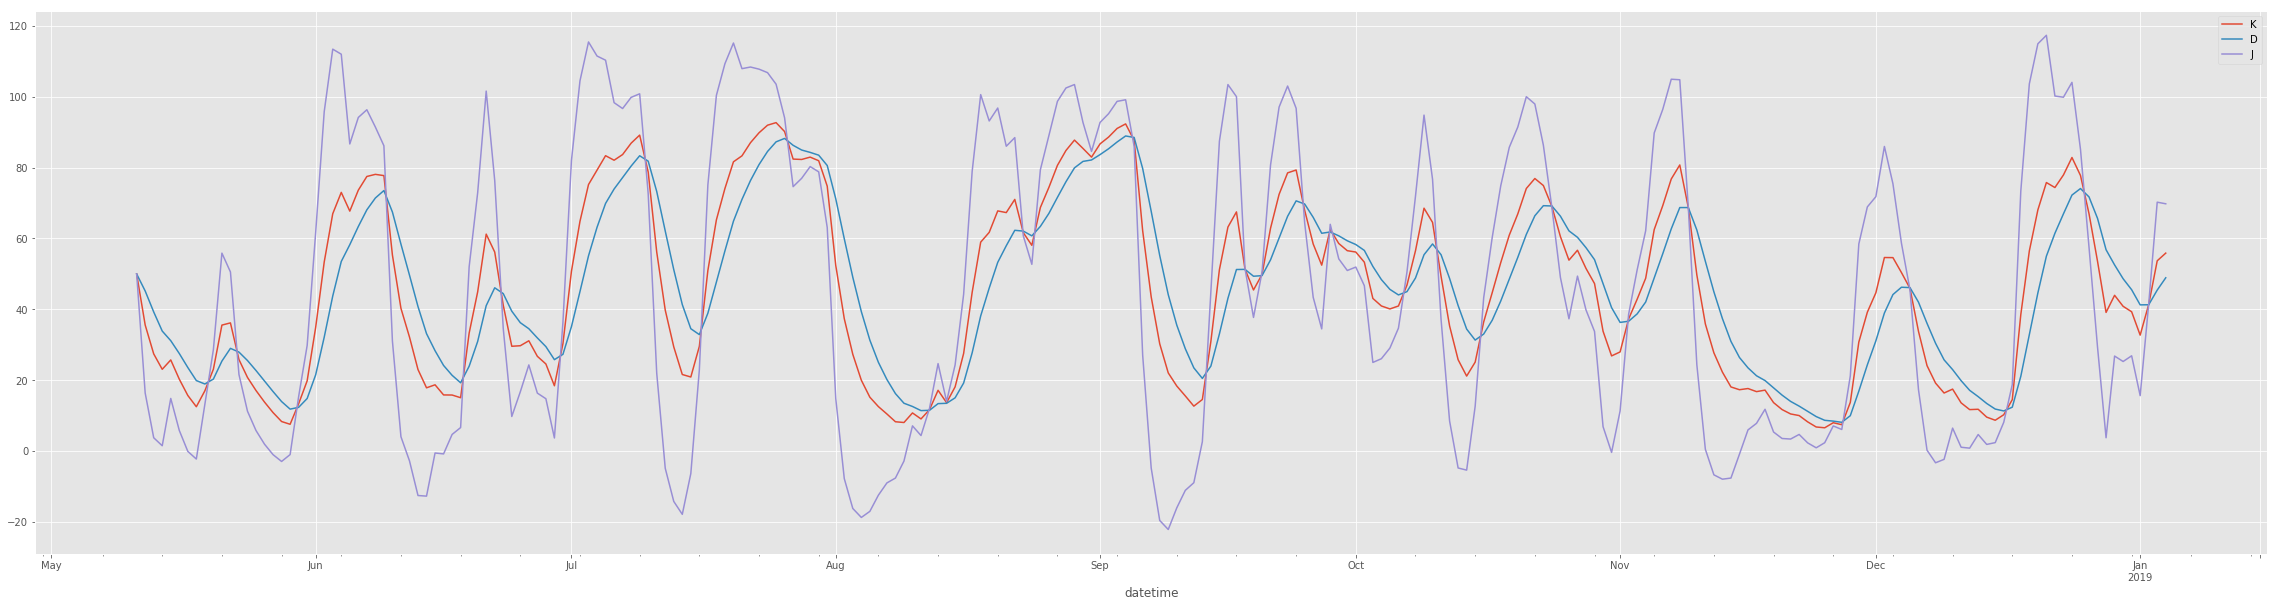

In [99]:
result.plot(figsize=(40,10))